In [1]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 75.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 79.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 54.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.1 MB/s eta

In [2]:
pip install tensorflow-gpu

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-x9v8dzbg/tensorflow-gpu_95676da8fba348d2859d6f1ff41f6eb5/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running

In [6]:
# python helper functions for plotting graphs -
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.style.use('fivethirtyeight')

x = np.linspace(-10, 10, 100)

def plot_graph(x, y, 
               ALPHA=0.6, 
               label_x = r"$x \rightarrow$", label_y=r"$act(x) \rightarrow$", 
               title=None,
               LABEL=None):
    plt.figure(figsize=(7,5))
    plt.axhline(y=0, color="black", linestyle="--", lw=2)
    plt.axvline(x=0, color="black", linestyle="--", lw=2)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)

    if LABEL != None:
        plt.plot(x, y, alpha=ALPHA, label=LABEL);
        plt.legend(fontsize=14)

    else:
        plt.plot(x, y, alpha=ALPHA);
      
# def derivative(f, x, eps=0.000001):
#     return (f(x + eps) - f(x - eps))/(2 * eps)

def derivative(f, x, delta_x=1e-6):
    return (f(x + delta_x) - f(x))/(delta_x)

Sigmoid Dunction

In [7]:
def sigmoid(x):
    return tf.keras.activations.sigmoid(x)

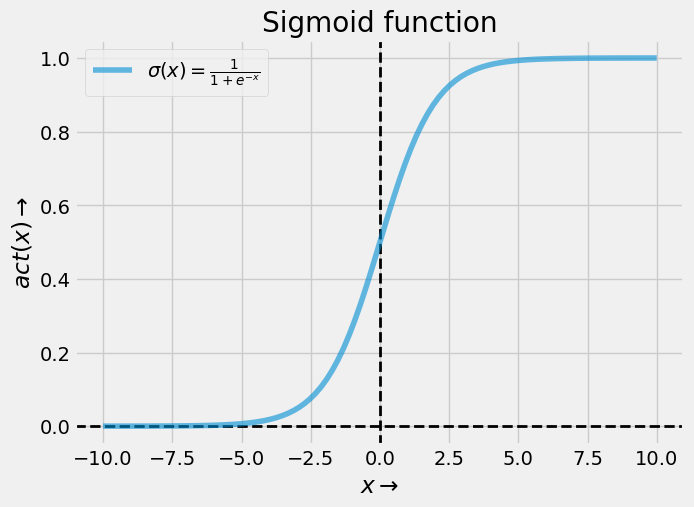

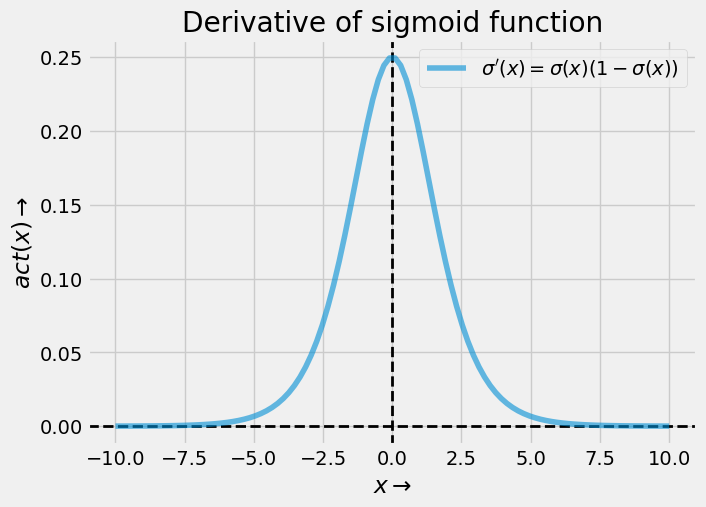

In [8]:
plot_graph(x, sigmoid(x), title="Sigmoid function", 
           LABEL=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")

plot_graph(x, derivative(sigmoid, x), title="Derivative of sigmoid function", 
           LABEL=r"$\sigma^\prime(x) = \sigma(x)(1-\sigma(x))$")


Rectified linear activation function (ReLU)

In [10]:
def relu(x):
    return tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)

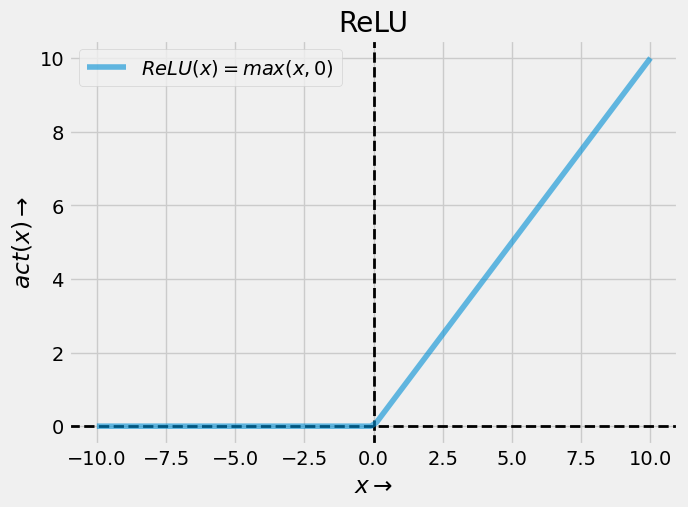

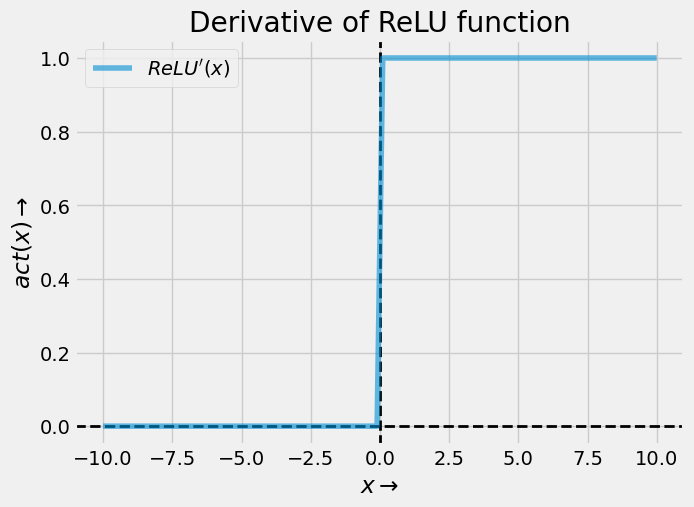

In [11]:
plot_graph(x, relu(x), title="ReLU",
           LABEL=r"$ReLU(x)= max(x,0)$");

plot_graph(x, derivative(relu, x), title="Derivative of ReLU function", 
           LABEL=r"$ReLU^\prime(x)$")

Hyperbolic Tengent Activation Function

In [12]:
def tanh(x):
    return tf.keras.activations.tanh(x)

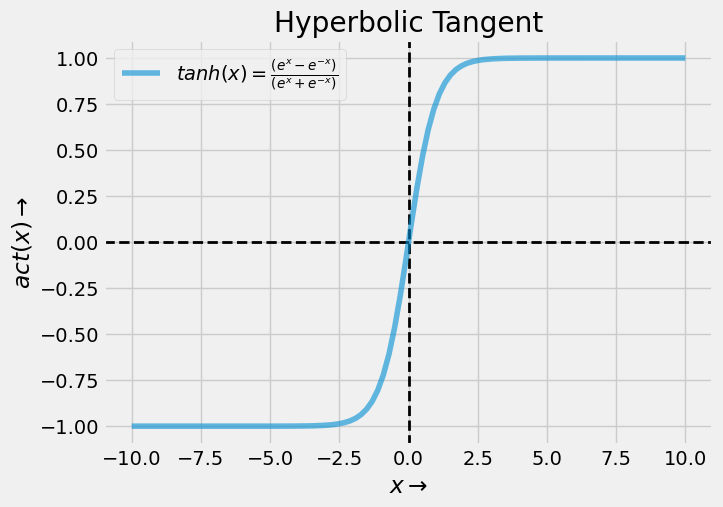

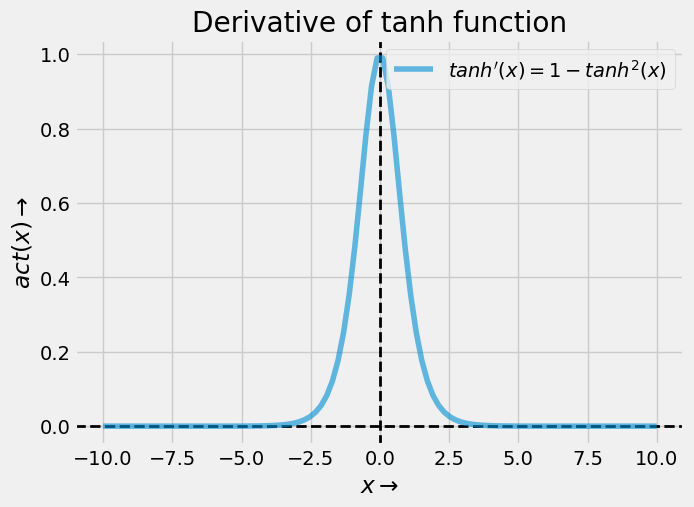

In [13]:
plot_graph(x, tanh(x), title="Hyperbolic Tangent",
           LABEL=r"$tanh(x) = \frac{(e^{x} - e^{-x})}{(e^{x} + e^{-x})}$");

plot_graph(x, derivative(tanh, x), title="Derivative of tanh function", 
           LABEL=r"$tanh^\prime(x) = 1 - tanh^2(x)$")

Leaky ReLU Function 

In [14]:
def leaky_relu(x, alpha=0.3):
    return np.where(x>=0, x, alpha*x)

In [15]:
# tf.keras.layers.LeakyReLU

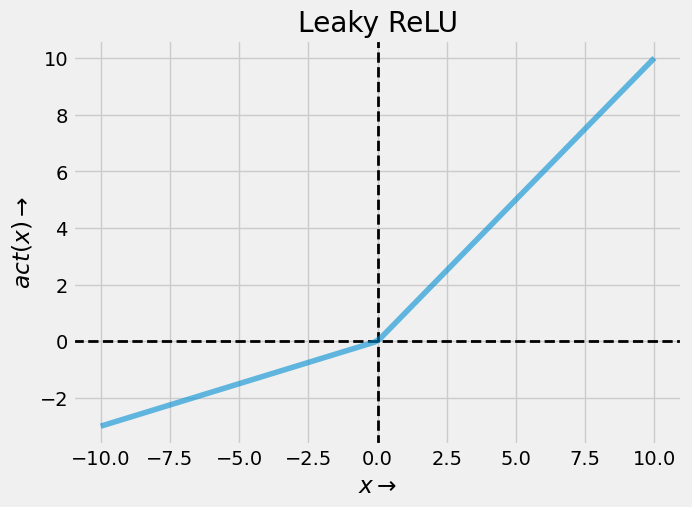

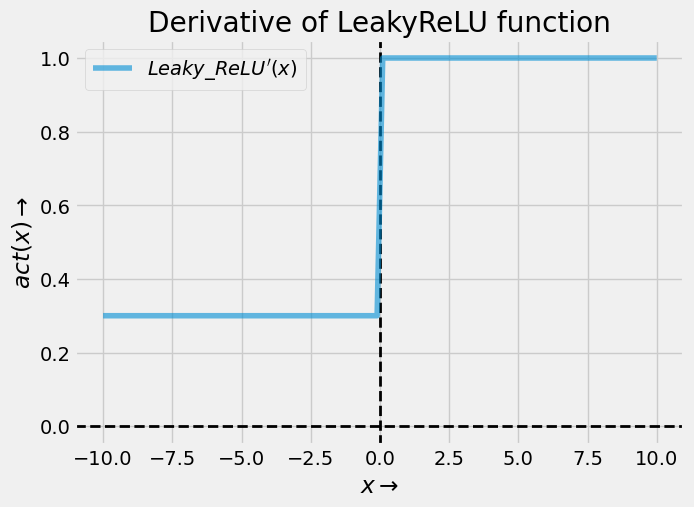

In [16]:
plot_graph(x, leaky_relu(x), title="Leaky ReLU");

plot_graph(x, derivative(leaky_relu, x), title="Derivative of LeakyReLU function", 
           LABEL=r"$Leaky\_ReLU^\prime(x)$")

ELU (Exponential Linear Units) Function

In [18]:
def elu(x, ALPHA=1.0):
    return tf.keras.activations.elu(x, alpha=ALPHA)

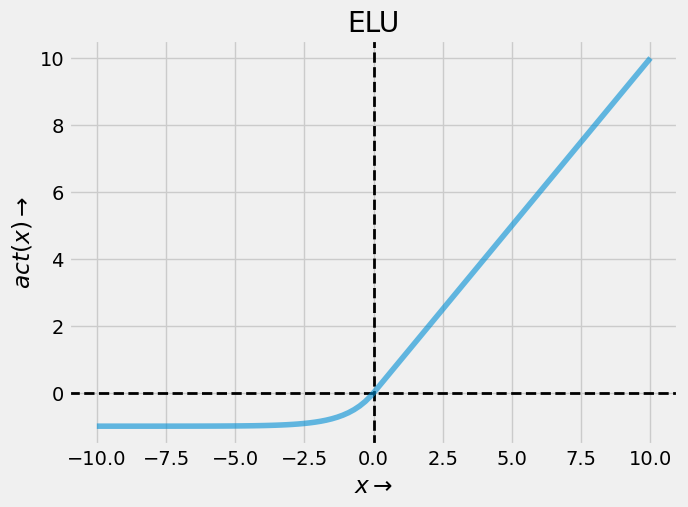

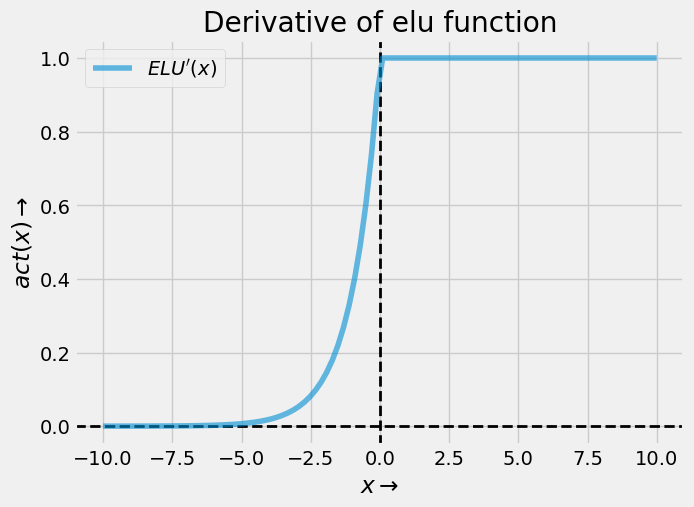

In [19]:
plot_graph(x, elu(x), title="ELU");

plot_graph(x, derivative(elu, x), title="Derivative of elu function", 
           LABEL=r"$ELU^\prime(x)$")

SELU

In [20]:

def selu(x, ALPHA=1.0):
    return tf.keras.activations.selu(x)

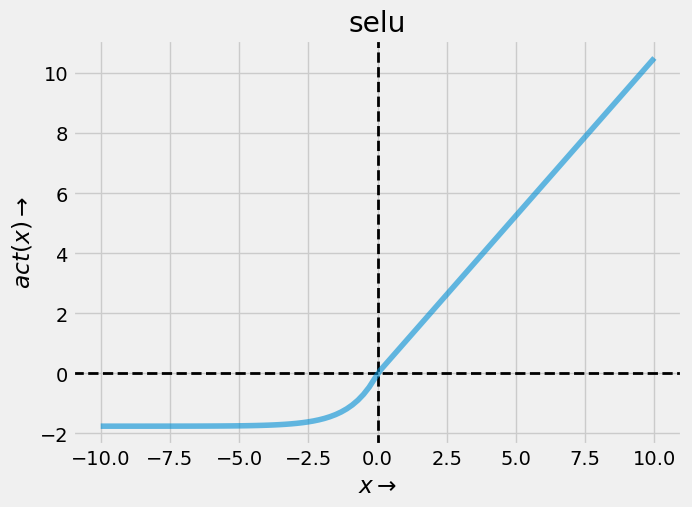

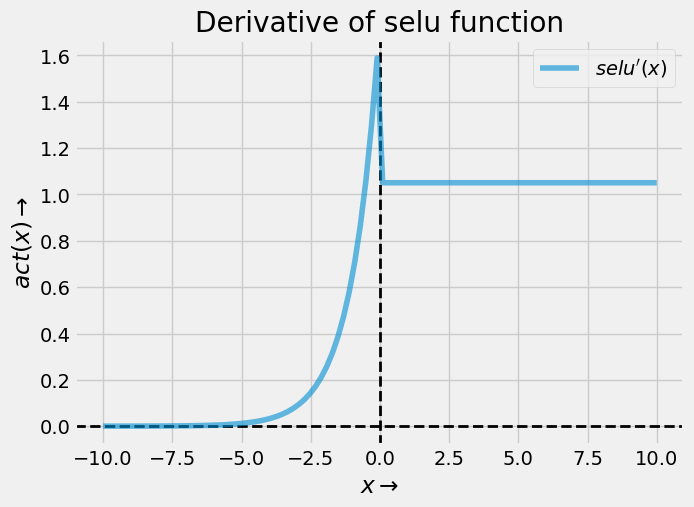

In [21]:
plot_graph(x, selu(x), title="selu");

plot_graph(x, derivative(selu, x), title="Derivative of selu function", 
           LABEL=r"$selu^\prime(x)$")

In [22]:

def selu_alt(x, ALPHA=1.67326324, scale=1.05070098):
    return scale * tf.keras.activations.elu(x, alpha=ALPHA)

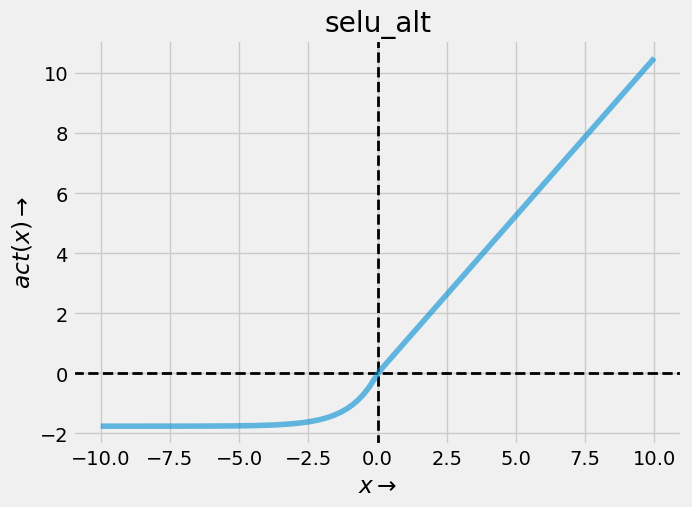

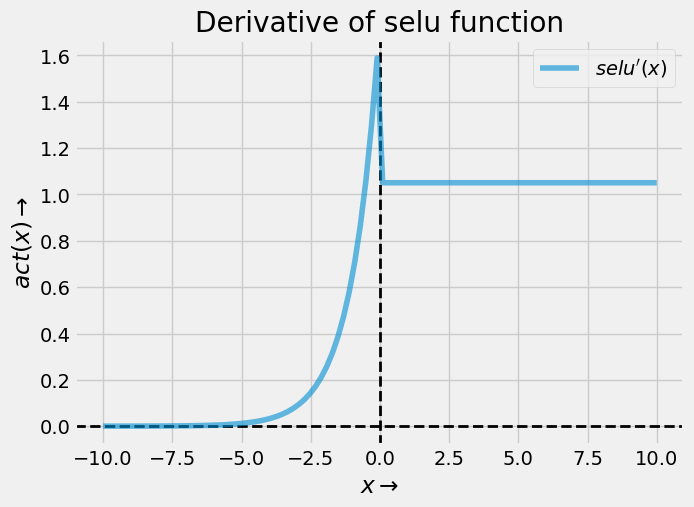

In [23]:
plot_graph(x, selu_alt(x), title="selu_alt");

plot_graph(x, derivative(selu_alt, x), title="Derivative of selu function", 
           LABEL=r"$selu^\prime(x)$")

softmax activation function

In [24]:
tf.keras.activations.softmax(tf.constant([[0.3,0.3,0.4,0.5,0.7]]), axis=-1)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.17186859, 0.17186859, 0.18994418, 0.20992078, 0.2563978 ]],
      dtype=float32)>

In [25]:
# np.sum(np.exp(x) / tf.reduce_sum(np.exp(x)))

In [26]:
import numpy as np
1 / (1 + np.exp(-10))

0.9999546021312976

In [27]:
def swish(z):
    return tf.keras.activations.swish(z)

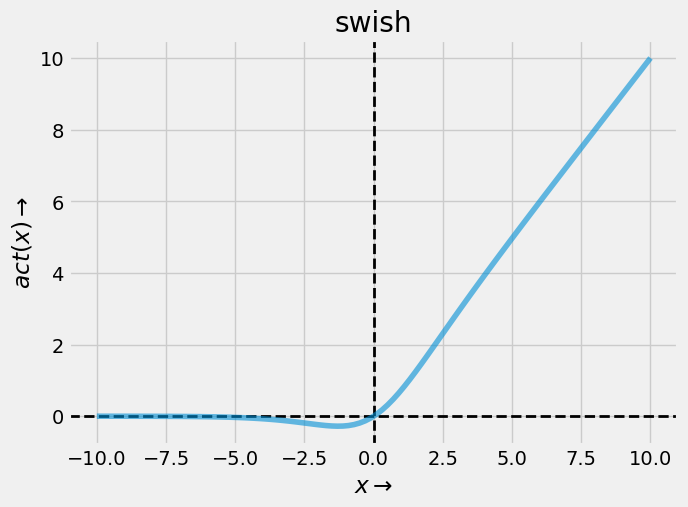

In [28]:
plot_graph(x, swish(x), title="swish");


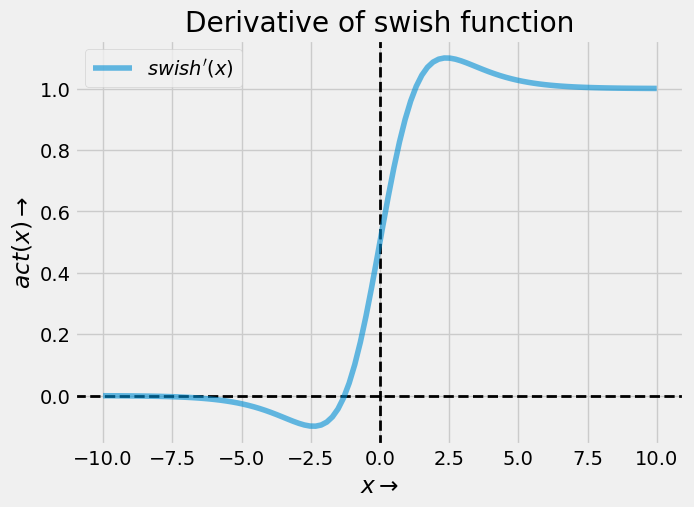

In [29]:

plot_graph(x, derivative(swish, x), title="Derivative of swish function", 
           LABEL=r"$swish^\prime(x)$")

In [30]:
def swish_beta(z, beta=0.1):
    return z * sigmoid(z * beta)

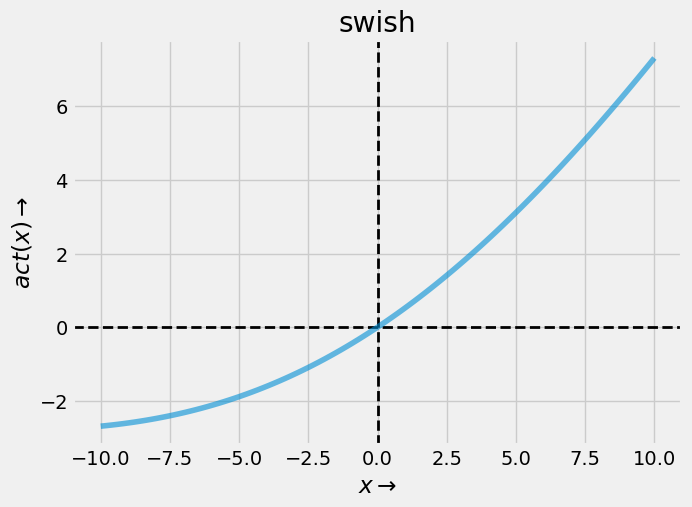

In [31]:
plot_graph(x, swish_beta(x), title="swish");


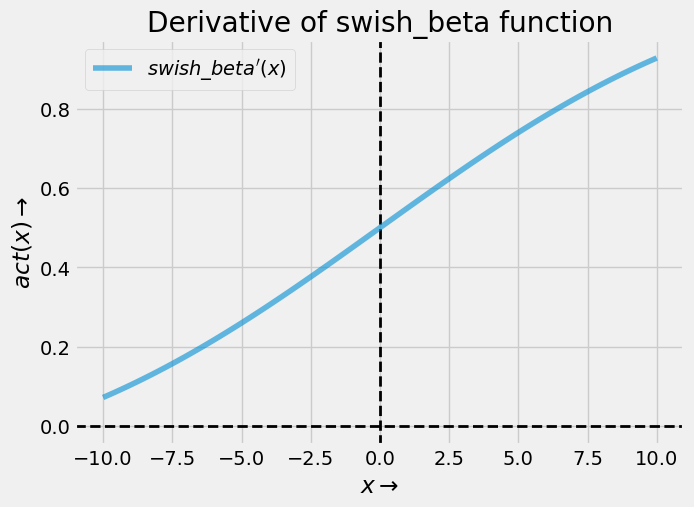

In [32]:

plot_graph(x, derivative(swish_beta, x), title="Derivative of swish_beta function", 
           LABEL=r"$swish\_beta^\prime(x)$")

Softplus